<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/333_Intro_to_YOLO_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install the ultralytics package using pip
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 4.1 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from IPython.display import Image
import torch
import yaml
import os

Load the model. Here, we will load both detection and instance models to see the difference in the type of results from these models.

Run inference on an input image using both models.

## Explore YOLO-v8 with an image from DATAET_FRAMES

In [ ]:
# IMG PATH: 1-youtube-downloader\
#           DATASET-FRAMES\DATASET-FRAMES-what-does-highquality-preschool-look-like\5980.jpg

100%|██████████| 6.73M/6.73M [00:00<00:00, 77.8MB/s]



image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/575.jpg: 384x640 (no detections), 136.1ms
Speed: 2.0ms preprocess, 136.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/575.jpg: 384x640 (no detections), 48.9ms
Speed: 1.9ms preprocess, 48.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


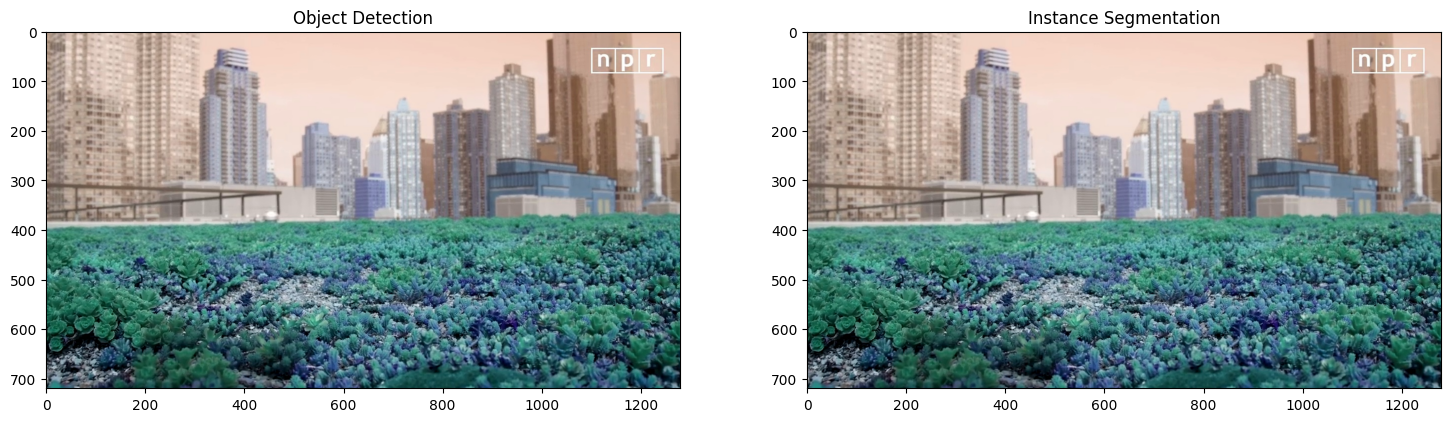

In [17]:
# Detection model
det_model = YOLO('yolov8n.pt')
# Instance model
inst_model = YOLO('yolov8n-seg.pt')
# Perform object detection on an image using the model
img = '/content/drive/MyDrive/Yolov8-custom/image-for-pred/575.jpg'
detection_results = det_model.predict(img)
instance_results = inst_model.predict(img)
# Predictions
detection_result_array = detection_results[0].plot()
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

You can explore the results manually. For example, how many instance results do we have, what is the label and bounding box coordinates for a specific detected object.

In [18]:
#Number of bounding boxes (objects) detected in the image
result = instance_results[0]
print("Number of bounding boxes (objects) detected: ", len(result.boxes))

Number of bounding boxes (objects) detected:  0



image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/690.jpg: 384x640 8 persons, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/690.jpg: 384x640 8 persons, 14.8ms
Speed: 1.6ms preprocess, 14.8ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


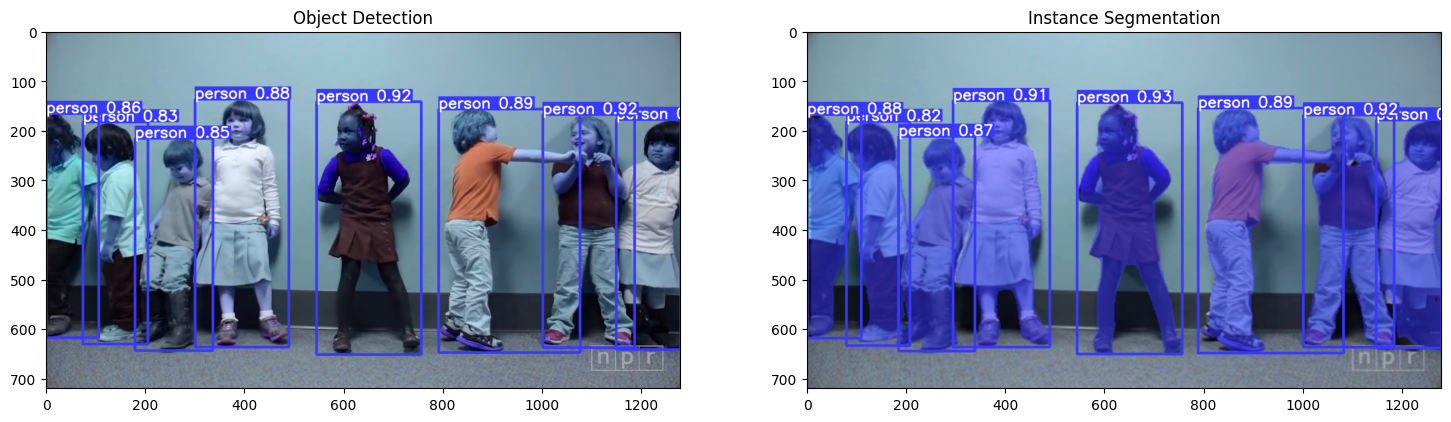

In [20]:
# Perform object detection on an image using the model
img = '/content/drive/MyDrive/Yolov8-custom/image-for-pred/690.jpg'
detection_results = det_model.predict(img)
instance_results = inst_model.predict(img)
# Predictions
detection_result_array = detection_results[0].plot()
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

In [21]:
#Number of bounding boxes (objects) detected in the image
result = instance_results[0]
print("Number of bounding boxes (objects) detected: ", len(result.boxes))

Number of bounding boxes (objects) detected:  8


In [22]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 0.0
Coordinates: [544.3052978515625, 144.18310546875, 756.130615234375, 651.5955200195312]
Probability: 0.9338552951812744
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: '

### Ultralytics YOLOv8 Python Usage

In [ ]:
# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='coco128.yaml', epochs=3)

# Evaluate the model's performance on the validation set
results = model.val()

# Perform object detection on an image using the model
results = model('https://ultralytics.com/images/bus.jpg')

# Export the model to ONNX format
success = model.export(format='onnx')

100%|██████████| 6.23M/6.23M [00:00<00:00, 107MB/s]


Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 6.66M/6.66M [00:00<00:00, 110MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3716.73file/s]

Dataset download success ✅ (1.3s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 28.0MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1803.11it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.71G      1.152      1.595      1.249        228        640: 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]

                   all        128        929      0.663      0.526      0.598      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3       2.6G      1.142      1.376      1.218        151        640: 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        128        929      0.683      0.536      0.615      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.55G       1.15      1.313      1.226        164        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        128        929      0.674      0.547      0.632      0.468



3 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


                   all        128        929      0.675      0.547      0.632      0.467
                person        128        254      0.796      0.669      0.767      0.548
               bicycle        128          6      0.581      0.333      0.319       0.28
                   car        128         46       0.72      0.217      0.278       0.18
            motorcycle        128          5      0.825      0.947      0.962      0.771
              airplane        128          6      0.682      0.667      0.913      0.692
                   bus        128          7      0.634      0.714      0.719      0.609
                 train        128          3      0.532      0.667      0.806      0.752
                 truck        128         12          1      0.392      0.512      0.314
                  boat        128          6      0.302      0.167      0.394      0.236
         traffic light        128         14      0.678      0.214      0.205      0.129
             stop sig

val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]


                   all        128        929      0.666      0.547      0.625      0.463
                person        128        254      0.804      0.677      0.775      0.554
               bicycle        128          6      0.577      0.333      0.318       0.28
                   car        128         46      0.716      0.217      0.276      0.182
            motorcycle        128          5      0.828      0.969      0.928      0.749
              airplane        128          6      0.678      0.667      0.913      0.692
                   bus        128          7      0.589      0.714      0.719      0.601
                 train        128          3      0.531      0.667      0.806      0.752
                 truck        128         12          1      0.404      0.499      0.298
                  boat        128          6      0.349      0.167      0.359      0.239
         traffic light        128         14      0.717      0.214      0.206      0.129
             stop sig

100%|██████████| 476k/476k [00:00<00:00, 17.3MB/s]

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 20.7ms
Speed: 3.8ms preprocess, 20.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 81.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 10.8s, saved as 'runs/detect/train/weights/best.onnx' (12.2 MB)

Export complete (12.4s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/usr/local/lib/python3.10/dist-packa

In [ ]:
!zip -r result.zip dataset/

## YOLO v8 Object Detection with additional custom dataset

In [4]:
#Detection model
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 85.4MB/s]


In [5]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [6]:
%cat /content/drive/MyDrive/Yolov8-custom/coco-custom.yaml

train: /train/images
val: /val/images

nc: 88

# Classes (the classes  on the last line is from the custom images)
names: ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", 
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", 
    "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", 
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", 
    "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", 
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", 
    "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", 
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", 
    "book", "clock", "vase", "scissors", "teddy bear", 

In [9]:
with open ("/content/drive/MyDrive/Yolov8-custom/coco-custom.yaml", "r") as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])
project = "/content/drive/MyDrive/Yolov8-custom/result"
name = "100_epochs-"
results = model.train(data="/content/drive/MyDrive/Yolov8-custom/coco-custom.yaml",
                      project=project,
                      name=name,
                      epochs=100,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Yolov8-custom/coco-custom.yaml, epochs=100, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Yolov8-custom/result, name=100_epochs-8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

100%|██████████| 755k/755k [00:00<00:00, 16.9MB/s]


Overriding model.yaml nc=80 with nc=88

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/Yolov8-custom/train/labels... 184 images, 6 backgrounds, 2 corrupt: 100%|██████████| 190/190 [00:47<00:00,  3.96it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Yolov8-custom/train/images/bridge_16.jpeg: ignoring corrupt image/label: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.
train: WARNING ⚠️ /content/drive/MyDrive/Yolov8-custom/train/images/bridge_44.jpeg: ignoring corrupt image/label: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.
train: New cache created: /content/drive/MyDrive/Yolov8-custom/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Yolov8-custom/val/labels... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:14<00:00,  1.97it/s]

val: New cache created: /content/drive/MyDrive/Yolov8-custom/val/labels.cache


Plotting labels to /content/drive/MyDrive/Yolov8-custom/result/100_epochs-8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000109, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Yolov8-custom/result/100_epochs-8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.15G      1.331      5.154      1.461         60        800: 100%|██████████| 47/47 [00:13<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all         29        110          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.15G      1.266      4.993      1.421         20        800: 100%|██████████| 47/47 [00:10<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]

                   all         29        110          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.16G      1.203      4.869        1.4         27        800: 100%|██████████| 47/47 [00:09<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all         29        110      0.013     0.0068     0.0114       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.16G      1.168      4.763      1.397         31        800: 100%|██████████| 47/47 [00:10<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         29        110      0.022     0.0763     0.0358     0.0203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.16G      1.191      4.572      1.383         23        800: 100%|██████████| 47/47 [00:10<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]


                   all         29        110     0.0256       0.14     0.0598     0.0374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.16G      1.219      4.439      1.408         37        800: 100%|██████████| 47/47 [00:10<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all         29        110     0.0173      0.168     0.0651     0.0396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.16G      1.194       4.22       1.39         42        800: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]


                   all         29        110      0.832     0.0384     0.0705     0.0426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.16G      1.164      4.073      1.353         47        800: 100%|██████████| 47/47 [00:11<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]


                   all         29        110      0.755      0.035     0.0661     0.0387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.19G      1.151      3.966       1.35         63        800: 100%|██████████| 47/47 [00:11<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all         29        110      0.735     0.0452     0.0632     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.18G      1.213      3.985      1.392         27        800: 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]

                   all         29        110      0.673     0.0492     0.0776     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.16G       1.22      3.898      1.412         37        800: 100%|██████████| 47/47 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]


                   all         29        110      0.635     0.0486     0.0815     0.0571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.16G      1.235      3.908      1.409         20        800: 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]


                   all         29        110      0.693     0.0372     0.0897     0.0621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.17G      1.209      3.713       1.41         57        800: 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all         29        110      0.682     0.0485     0.0993     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.16G      1.207      3.767      1.392         33        800: 100%|██████████| 47/47 [00:11<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all         29        110     0.0264      0.315      0.124      0.087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.16G      1.168      3.526      1.375         76        800: 100%|██████████| 47/47 [00:10<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all         29        110      0.586      0.119      0.124     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.16G      1.151      3.544      1.389         39        800: 100%|██████████| 47/47 [00:10<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all         29        110      0.649      0.102      0.114     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.15G      1.145      3.457      1.372         20        800: 100%|██████████| 47/47 [00:11<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all         29        110       0.63       0.11      0.108     0.0709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.15G      1.184       3.44      1.357         36        800: 100%|██████████| 47/47 [00:11<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]


                   all         29        110      0.596      0.102      0.107     0.0713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.17G      1.196      3.461      1.401         33        800: 100%|██████████| 47/47 [00:11<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all         29        110       0.68     0.0998      0.128     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.16G      1.132      3.278      1.317         38        800: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all         29        110      0.739     0.0981      0.139     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.15G      1.128       3.35      1.313         59        800: 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all         29        110      0.599      0.156      0.163      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.16G      1.146      3.185      1.373         44        800: 100%|██████████| 47/47 [00:11<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]


                   all         29        110       0.63      0.164      0.191      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.16G      1.157      3.173      1.349         28        800: 100%|██████████| 47/47 [00:11<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all         29        110      0.582      0.171      0.186      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.16G      1.136      3.059      1.347         30        800: 100%|██████████| 47/47 [00:10<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all         29        110      0.699      0.135      0.194      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.16G      1.141      3.035      1.375         31        800: 100%|██████████| 47/47 [00:10<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all         29        110      0.526      0.218       0.22      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.17G      1.145      3.118      1.354         22        800: 100%|██████████| 47/47 [00:10<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all         29        110      0.542      0.237      0.225      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.16G      1.178       3.13      1.366         31        800: 100%|██████████| 47/47 [00:11<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.68it/s]


                   all         29        110      0.552      0.252      0.212      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.16G      1.119      2.983      1.342         36        800: 100%|██████████| 47/47 [00:11<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all         29        110      0.567       0.25      0.215       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.16G      1.154      3.017      1.351         36        800: 100%|██████████| 47/47 [00:11<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]


                   all         29        110      0.593      0.244      0.241      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.16G      1.142      2.826      1.322         39        800: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]


                   all         29        110      0.625      0.233      0.234       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.16G      1.091      2.786       1.28         15        800: 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all         29        110      0.579      0.227      0.227      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.16G      1.071      2.744      1.325         25        800: 100%|██████████| 47/47 [00:11<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         29        110      0.575      0.235      0.228      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.15G      1.135      2.834       1.39         68        800: 100%|██████████| 47/47 [00:11<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all         29        110      0.572      0.224      0.227      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.16G      1.141      2.754      1.342         97        800: 100%|██████████| 47/47 [00:11<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all         29        110      0.584      0.232      0.255      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.15G      1.123      2.786      1.363         26        800: 100%|██████████| 47/47 [00:10<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]


                   all         29        110      0.583      0.263      0.252      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.18G      1.144      2.697      1.337         27        800: 100%|██████████| 47/47 [00:09<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all         29        110       0.66      0.226      0.256      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.16G      1.138      2.769      1.329         53        800: 100%|██████████| 47/47 [00:10<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all         29        110      0.643      0.224      0.248      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.16G      1.101      2.681      1.363         41        800: 100%|██████████| 47/47 [00:11<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all         29        110      0.676       0.24      0.256      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.16G      1.154      2.651      1.341         47        800: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]


                   all         29        110      0.652      0.231      0.273      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.16G      1.126      2.632      1.318         18        800: 100%|██████████| 47/47 [00:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all         29        110      0.629      0.222      0.286      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.18G      1.122      2.551      1.304         37        800: 100%|██████████| 47/47 [00:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]


                   all         29        110      0.661       0.22      0.292      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.18G      1.099      2.563      1.308         43        800: 100%|██████████| 47/47 [00:11<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]


                   all         29        110      0.684      0.217      0.301      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.16G      1.089      2.467      1.326         72        800: 100%|██████████| 47/47 [00:11<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]


                   all         29        110      0.637      0.226      0.301      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.16G      1.064      2.522       1.31         34        800: 100%|██████████| 47/47 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]

                   all         29        110      0.657       0.23        0.3      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.18G      1.062        2.5      1.307         27        800: 100%|██████████| 47/47 [00:11<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all         29        110       0.64      0.241      0.295      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.17G      1.104       2.53      1.359         14        800: 100%|██████████| 47/47 [00:09<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all         29        110      0.625      0.262      0.291      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.16G      1.076      2.434      1.326         50        800: 100%|██████████| 47/47 [00:10<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.58it/s]

                   all         29        110      0.717      0.198       0.28      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.15G      1.108      2.506      1.324         28        800: 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]


                   all         29        110      0.607      0.244      0.295        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.16G      1.062       2.39      1.353         42        800: 100%|██████████| 47/47 [00:11<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]


                   all         29        110      0.641      0.216      0.303      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.17G      1.116       2.52      1.331         38        800: 100%|██████████| 47/47 [00:11<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all         29        110      0.574      0.267      0.298      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.16G      1.089      2.429      1.316         54        800: 100%|██████████| 47/47 [00:11<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all         29        110      0.579      0.261       0.27      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.16G      1.086      2.402      1.327         37        800: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         29        110      0.592      0.246      0.292      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.16G      1.038      2.311      1.263         25        800: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all         29        110      0.588      0.242      0.296      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.16G       1.05      2.355      1.317         97        800: 100%|██████████| 47/47 [00:10<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all         29        110      0.587       0.24      0.298      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.17G      1.056      2.307      1.303         34        800: 100%|██████████| 47/47 [00:09<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]


                   all         29        110      0.622      0.245      0.298      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.19G      1.083       2.29      1.278         81        800: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]


                   all         29        110      0.588      0.244      0.288      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.16G      1.051      2.253      1.292         40        800: 100%|██████████| 47/47 [00:11<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]


                   all         29        110      0.681      0.224      0.288       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.16G      1.099      2.279      1.274         36        800: 100%|██████████| 47/47 [00:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]


                   all         29        110      0.673      0.223      0.301      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.16G      1.014      2.242      1.295         40        800: 100%|██████████| 47/47 [00:11<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]


                   all         29        110      0.609      0.254      0.303      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.16G      1.104      2.342      1.314         33        800: 100%|██████████| 47/47 [00:11<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all         29        110      0.623       0.24      0.301      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.18G      1.056       2.27      1.279         46        800: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all         29        110      0.583      0.256      0.298      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.16G      1.089       2.26       1.29         41        800: 100%|██████████| 47/47 [00:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]


                   all         29        110      0.577      0.248       0.29      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.16G      1.004      2.168      1.273         32        800: 100%|██████████| 47/47 [00:11<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]


                   all         29        110      0.609      0.238      0.287      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.25G      1.073      2.191      1.271         27        800: 100%|██████████| 47/47 [00:11<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]


                   all         29        110      0.618      0.242      0.287      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.18G      1.068      2.201      1.283         56        800: 100%|██████████| 47/47 [00:11<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]


                   all         29        110      0.612      0.249       0.29      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.16G      1.035      2.179      1.281         18        800: 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]


                   all         29        110      0.558      0.266        0.3      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.16G      1.023      2.144      1.257         37        800: 100%|██████████| 47/47 [00:10<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all         29        110      0.585       0.27      0.294      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.15G      1.024      2.105      1.235         20        800: 100%|██████████| 47/47 [00:10<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all         29        110      0.562      0.266       0.29      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.16G      1.053      2.215      1.274         56        800: 100%|██████████| 47/47 [00:10<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all         29        110      0.612       0.25      0.286      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.16G      1.043       2.16      1.271         14        800: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]


                   all         29        110      0.598      0.264       0.29      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.19G      1.013      2.137      1.283         59        800: 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]


                   all         29        110      0.547      0.252      0.286      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.18G      1.021      2.096      1.246         67        800: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]


                   all         29        110      0.609      0.256      0.297      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.16G      1.051      2.157      1.284         52        800: 100%|██████████| 47/47 [00:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]


                   all         29        110      0.576      0.258      0.284      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.16G     0.9895      1.996      1.254         49        800: 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all         29        110      0.602      0.256      0.293      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.16G      1.019      2.215      1.309         39        800: 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         29        110      0.633      0.223      0.278      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.16G      1.036      2.134      1.261         26        800: 100%|██████████| 47/47 [00:11<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all         29        110       0.54      0.253      0.279      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.16G      1.016      2.129      1.263         76        800: 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]


                   all         29        110      0.548      0.254      0.283      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.16G      1.028      2.164      1.257         45        800: 100%|██████████| 47/47 [00:10<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all         29        110      0.549      0.249      0.275      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.18G     0.9974      2.061      1.276         32        800: 100%|██████████| 47/47 [00:09<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all         29        110      0.525      0.301      0.299      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.16G      1.032      2.146      1.276         18        800: 100%|██████████| 47/47 [00:10<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]


                   all         29        110      0.564      0.315      0.308      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.16G     0.9995      2.178      1.302         29        800: 100%|██████████| 47/47 [00:10<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         29        110      0.539       0.28      0.291      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.16G      1.045      2.182       1.28         35        800: 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all         29        110      0.538      0.284       0.29      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.18G      0.983      2.015      1.244         53        800: 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]


                   all         29        110      0.576      0.295      0.298      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.16G      1.045      2.125      1.296         29        800: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]


                   all         29        110      0.544       0.29      0.299      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.16G      1.047      2.088      1.237         30        800: 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]


                   all         29        110      0.555      0.288      0.292      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.15G      1.027      2.128      1.267         26        800: 100%|██████████| 47/47 [00:11<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all         29        110      0.586      0.286      0.308      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.16G     0.9972      2.054      1.261         24        800: 100%|██████████| 47/47 [00:11<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]


                   all         29        110      0.569      0.289      0.301      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.16G      1.036      2.072      1.246         50        800: 100%|██████████| 47/47 [00:11<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]


                   all         29        110      0.534      0.302      0.291      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.16G      1.026      2.023      1.284         66        800: 100%|██████████| 47/47 [00:10<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]


                   all         29        110      0.575      0.281        0.3        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.16G       1.03      2.072      1.288         80        800: 100%|██████████| 47/47 [00:10<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all         29        110        0.6      0.286      0.302      0.202


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.16G       1.13      2.555      1.376         12        800: 100%|██████████| 47/47 [00:12<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all         29        110      0.575      0.261      0.316      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.16G      1.088      2.559      1.347         20        800: 100%|██████████| 47/47 [00:09<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all         29        110      0.547      0.294      0.309      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.16G      1.116      2.641      1.371         39        800: 100%|██████████| 47/47 [00:09<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]


                   all         29        110      0.578      0.258      0.312      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.16G      1.086      2.426      1.326         23        800: 100%|██████████| 47/47 [00:10<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]


                   all         29        110      0.592      0.282      0.331      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.16G      1.073      2.347      1.329         22        800: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all         29        110      0.609      0.285      0.339      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.18G      1.092      2.433      1.357          6        800: 100%|██████████| 47/47 [00:11<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]


                   all         29        110      0.656      0.254      0.328      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.16G      1.072      2.408      1.332         26        800: 100%|██████████| 47/47 [00:11<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         29        110      0.648      0.272      0.337      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.16G      1.103      2.335      1.343         16        800: 100%|██████████| 47/47 [00:11<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]


                   all         29        110      0.666      0.273      0.337      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.16G       1.08      2.498      1.358          6        800: 100%|██████████| 47/47 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]


                   all         29        110       0.61      0.264      0.317       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.16G      1.128      2.502      1.353         16        800: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]


                   all         29        110      0.614      0.271      0.329      0.227

100 epochs completed in 0.364 hours.
Optimizer stripped from /content/drive/MyDrive/Yolov8-custom/result/100_epochs-8/weights/last.pt, 6.7MB
Optimizer stripped from /content/drive/MyDrive/Yolov8-custom/result/100_epochs-8/weights/best.pt, 6.7MB

Validating /content/drive/MyDrive/Yolov8-custom/result/100_epochs-8/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3224552 parameters, 0 gradients, 9.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]


                   all         29        110      0.628      0.274      0.337      0.235
                person         29         21      0.646      0.381      0.446      0.289
               bicycle         29          1          1          0          0          0
                   car         29         14          1      0.131      0.346      0.161
            motorcycle         29          2      0.233        0.5      0.566      0.453
                 train         29          1          1          0      0.332      0.199
                 truck         29          3    0.00153    0.00102      0.172      0.103
             stop sign         29          1          1          0          0          0
                   dog         29          2          1      0.704      0.995      0.846
                 horse         29          2          0          0          0          0
              elephant         29          2      0.713        0.5       0.62      0.373
                 zebr

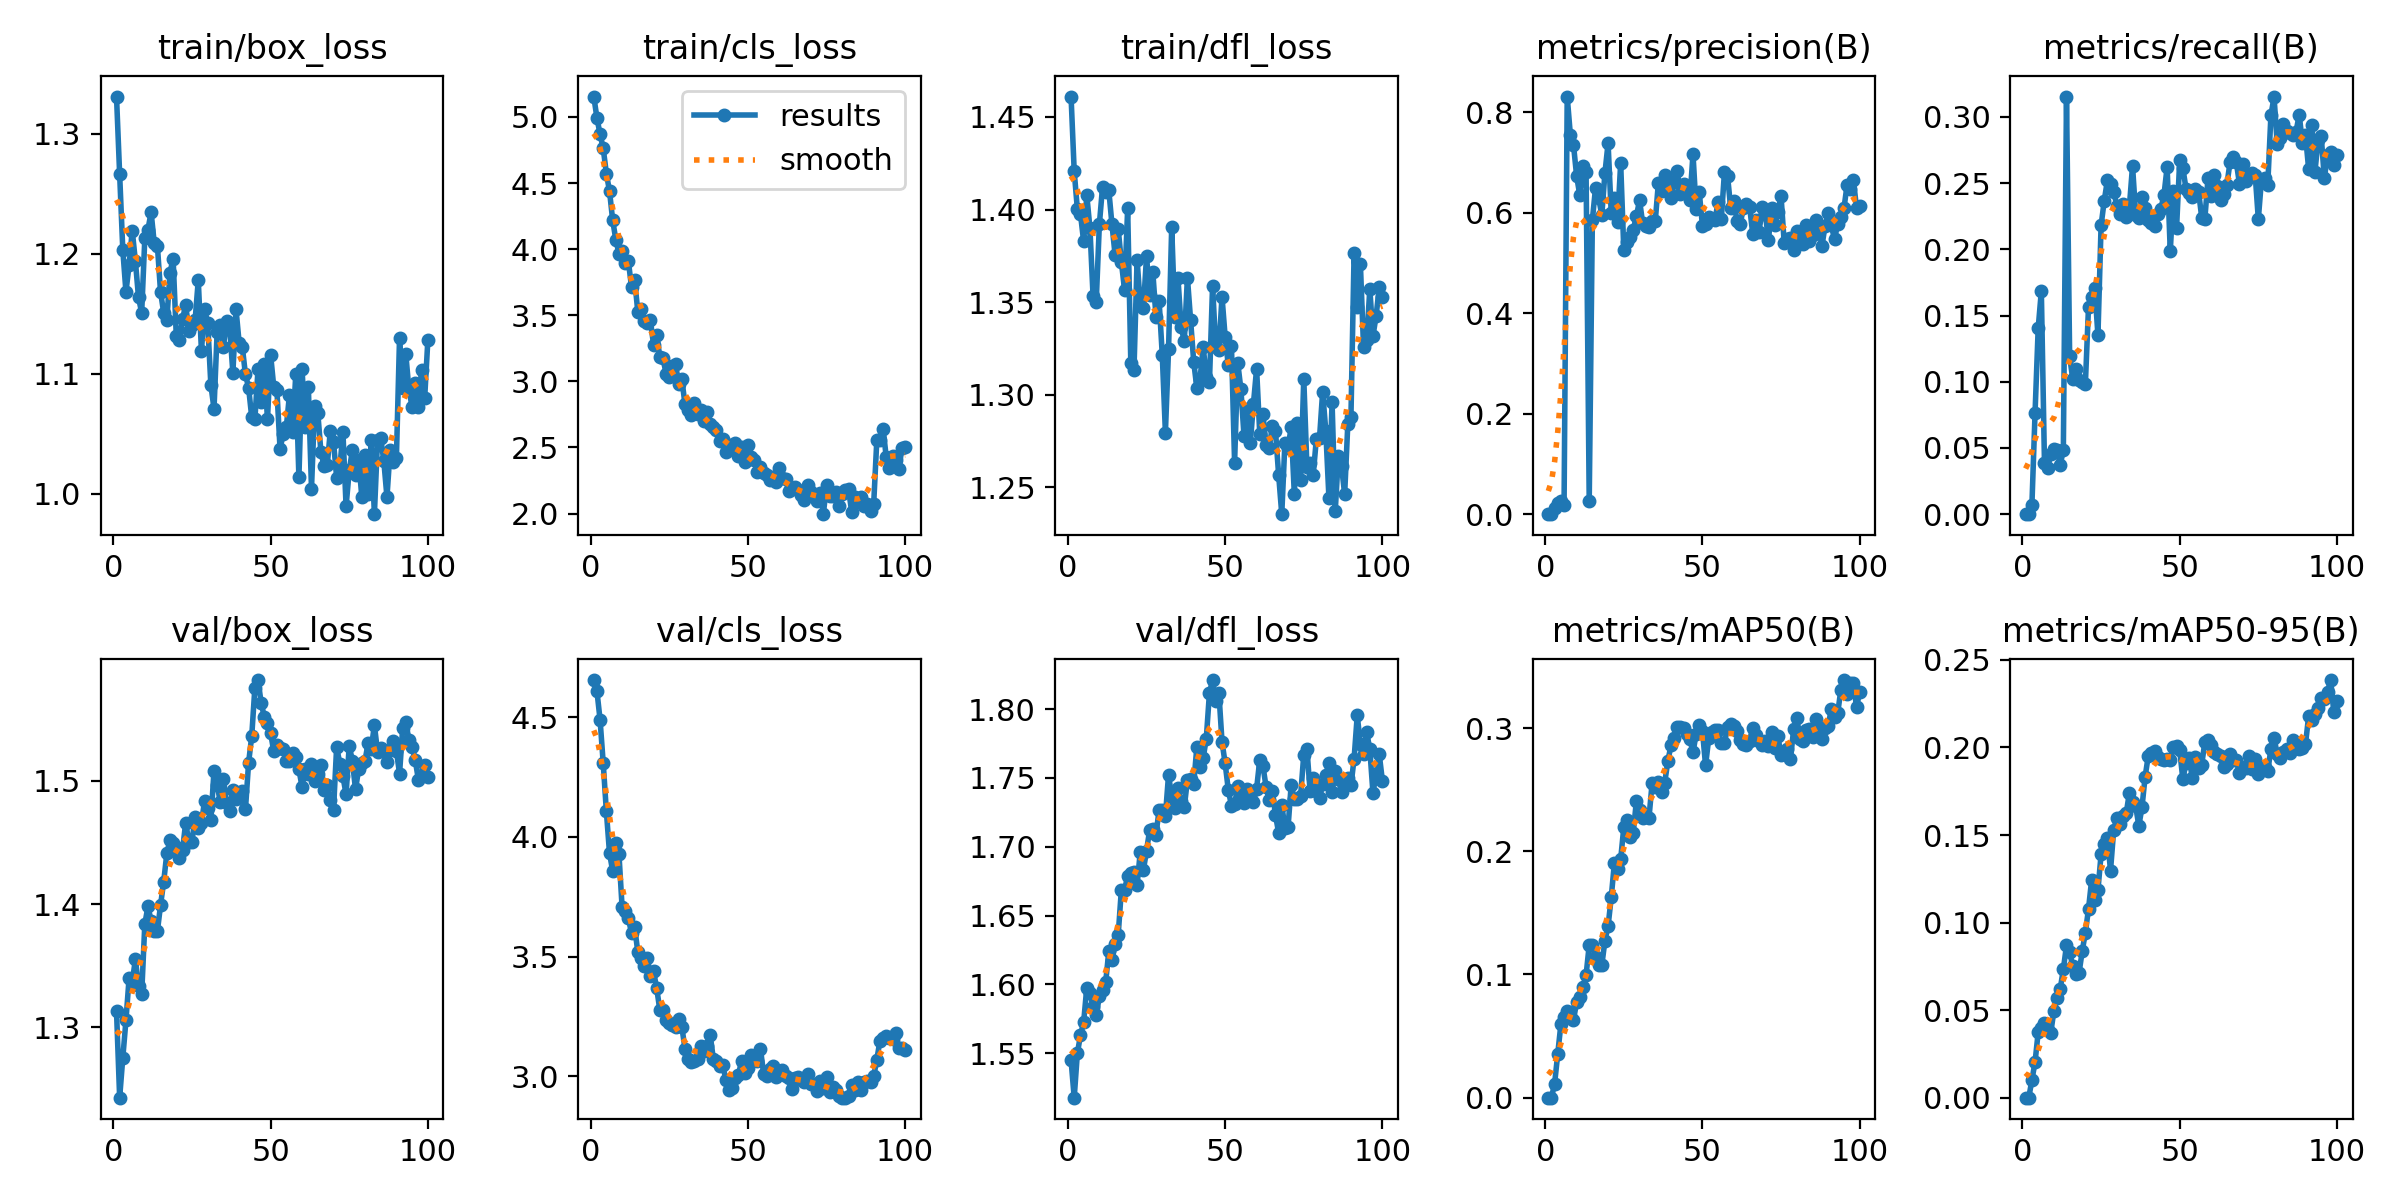

In [12]:
Image('/content/drive/MyDrive/Yolov8-custom/result/100_epochs/results.png')

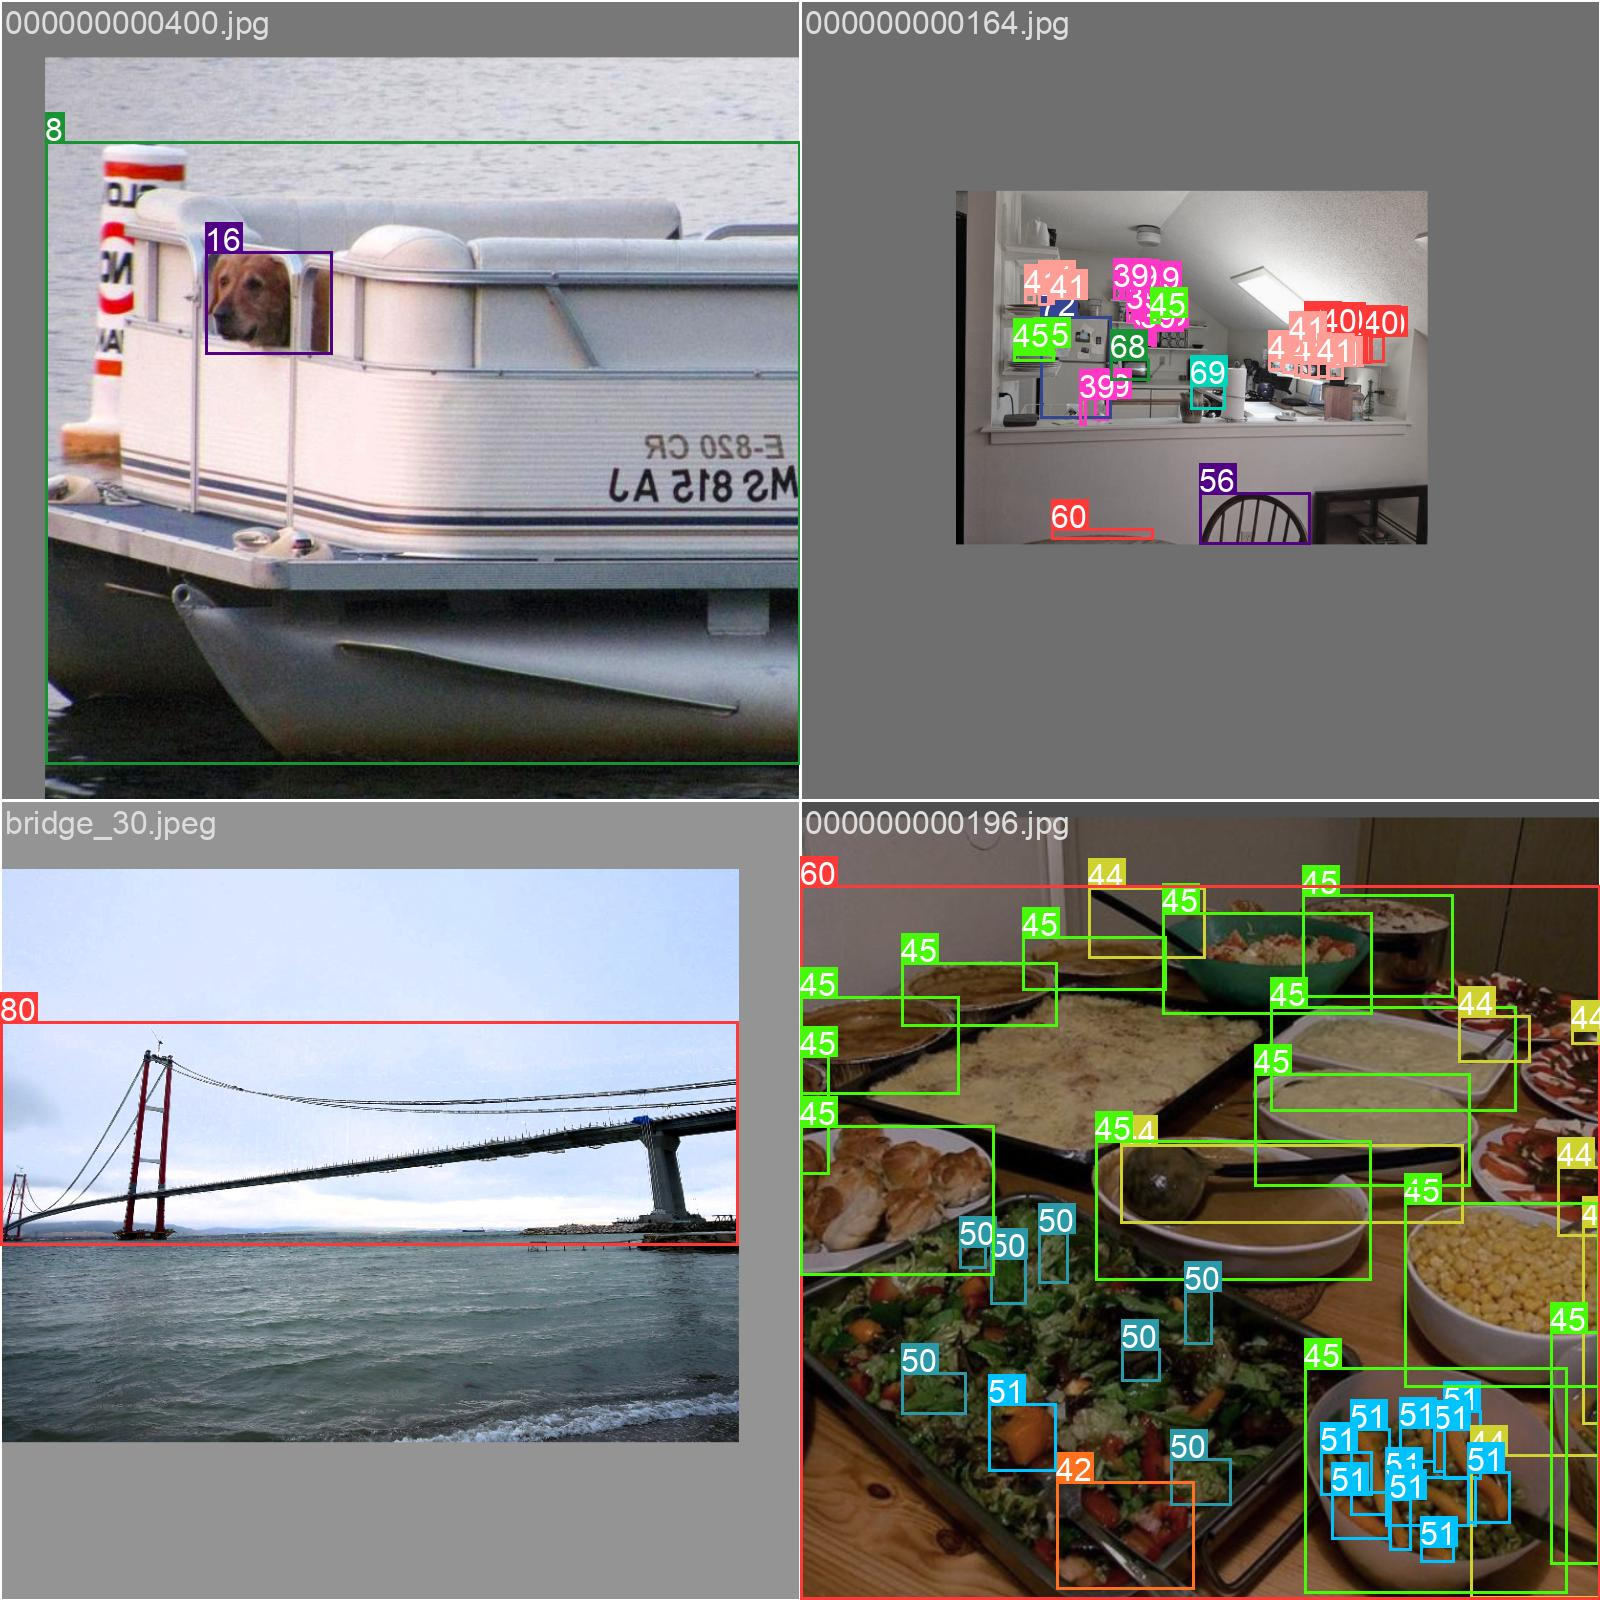

In [13]:
Image('/content/drive/MyDrive/Yolov8-custom/result/100_epochs/train_batch4232.jpg')

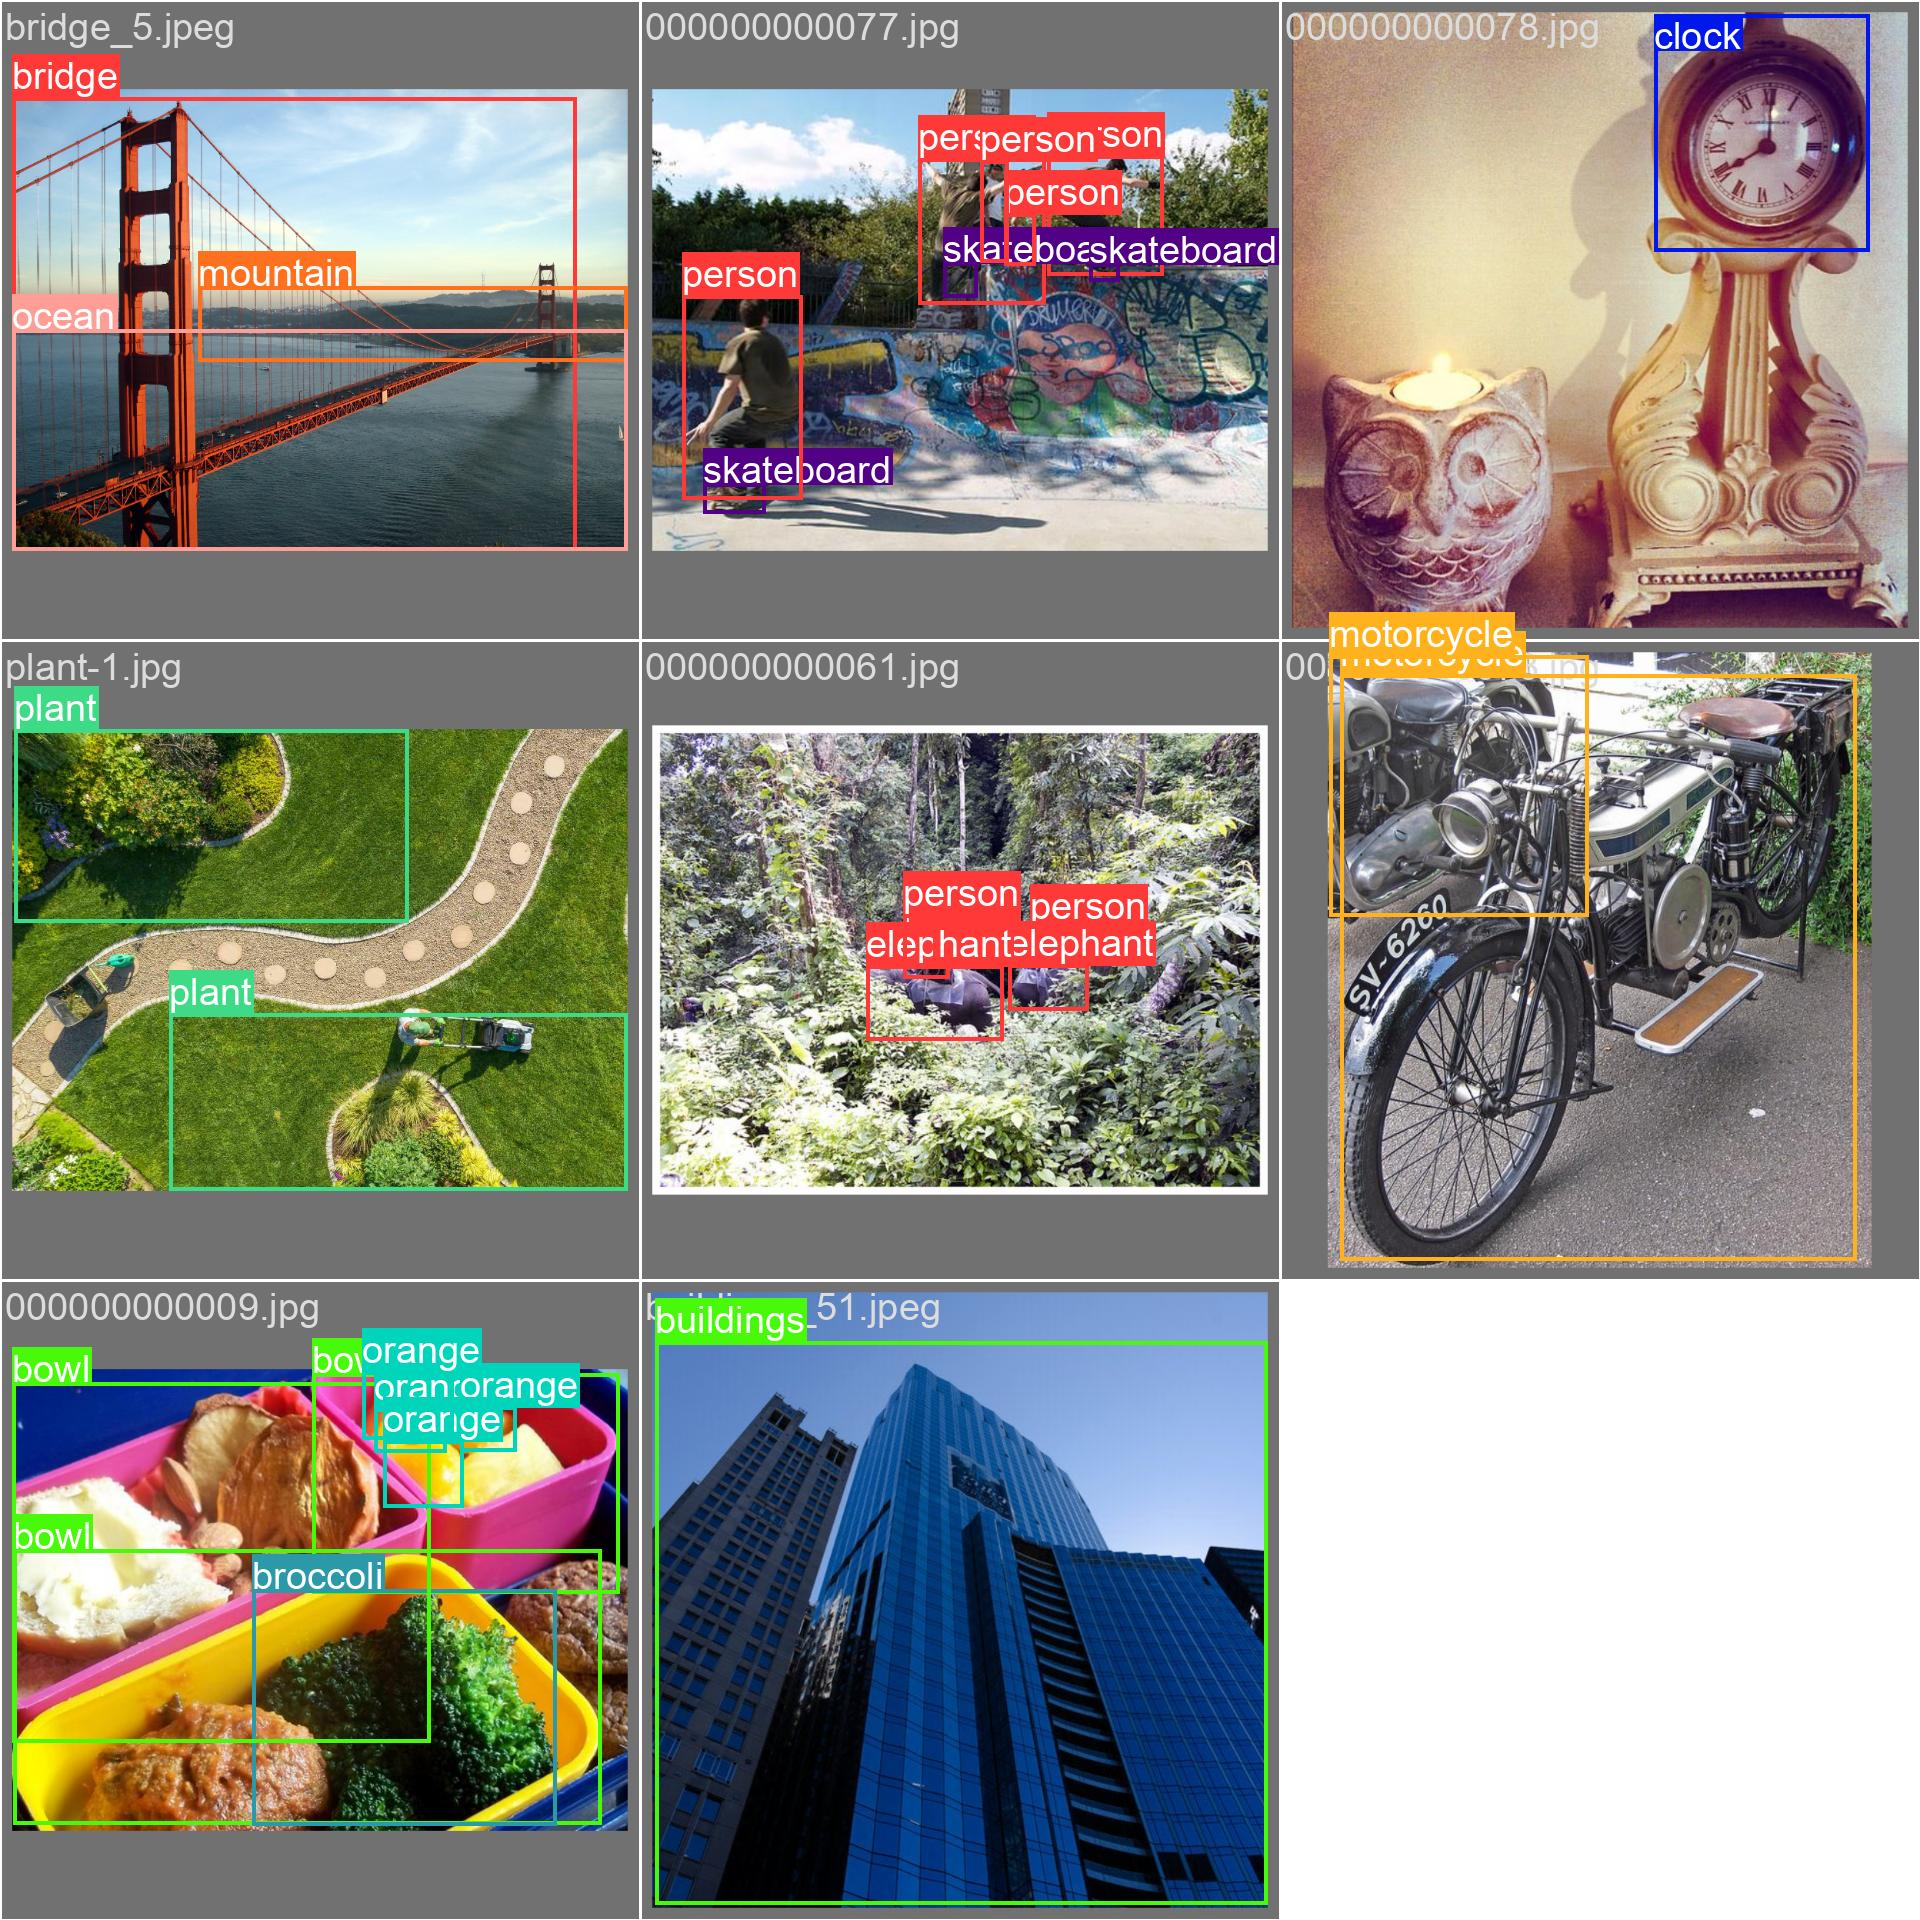

In [14]:
Image('/content/drive/MyDrive/Yolov8-custom/result/100_epochs/val_batch2_labels.jpg')

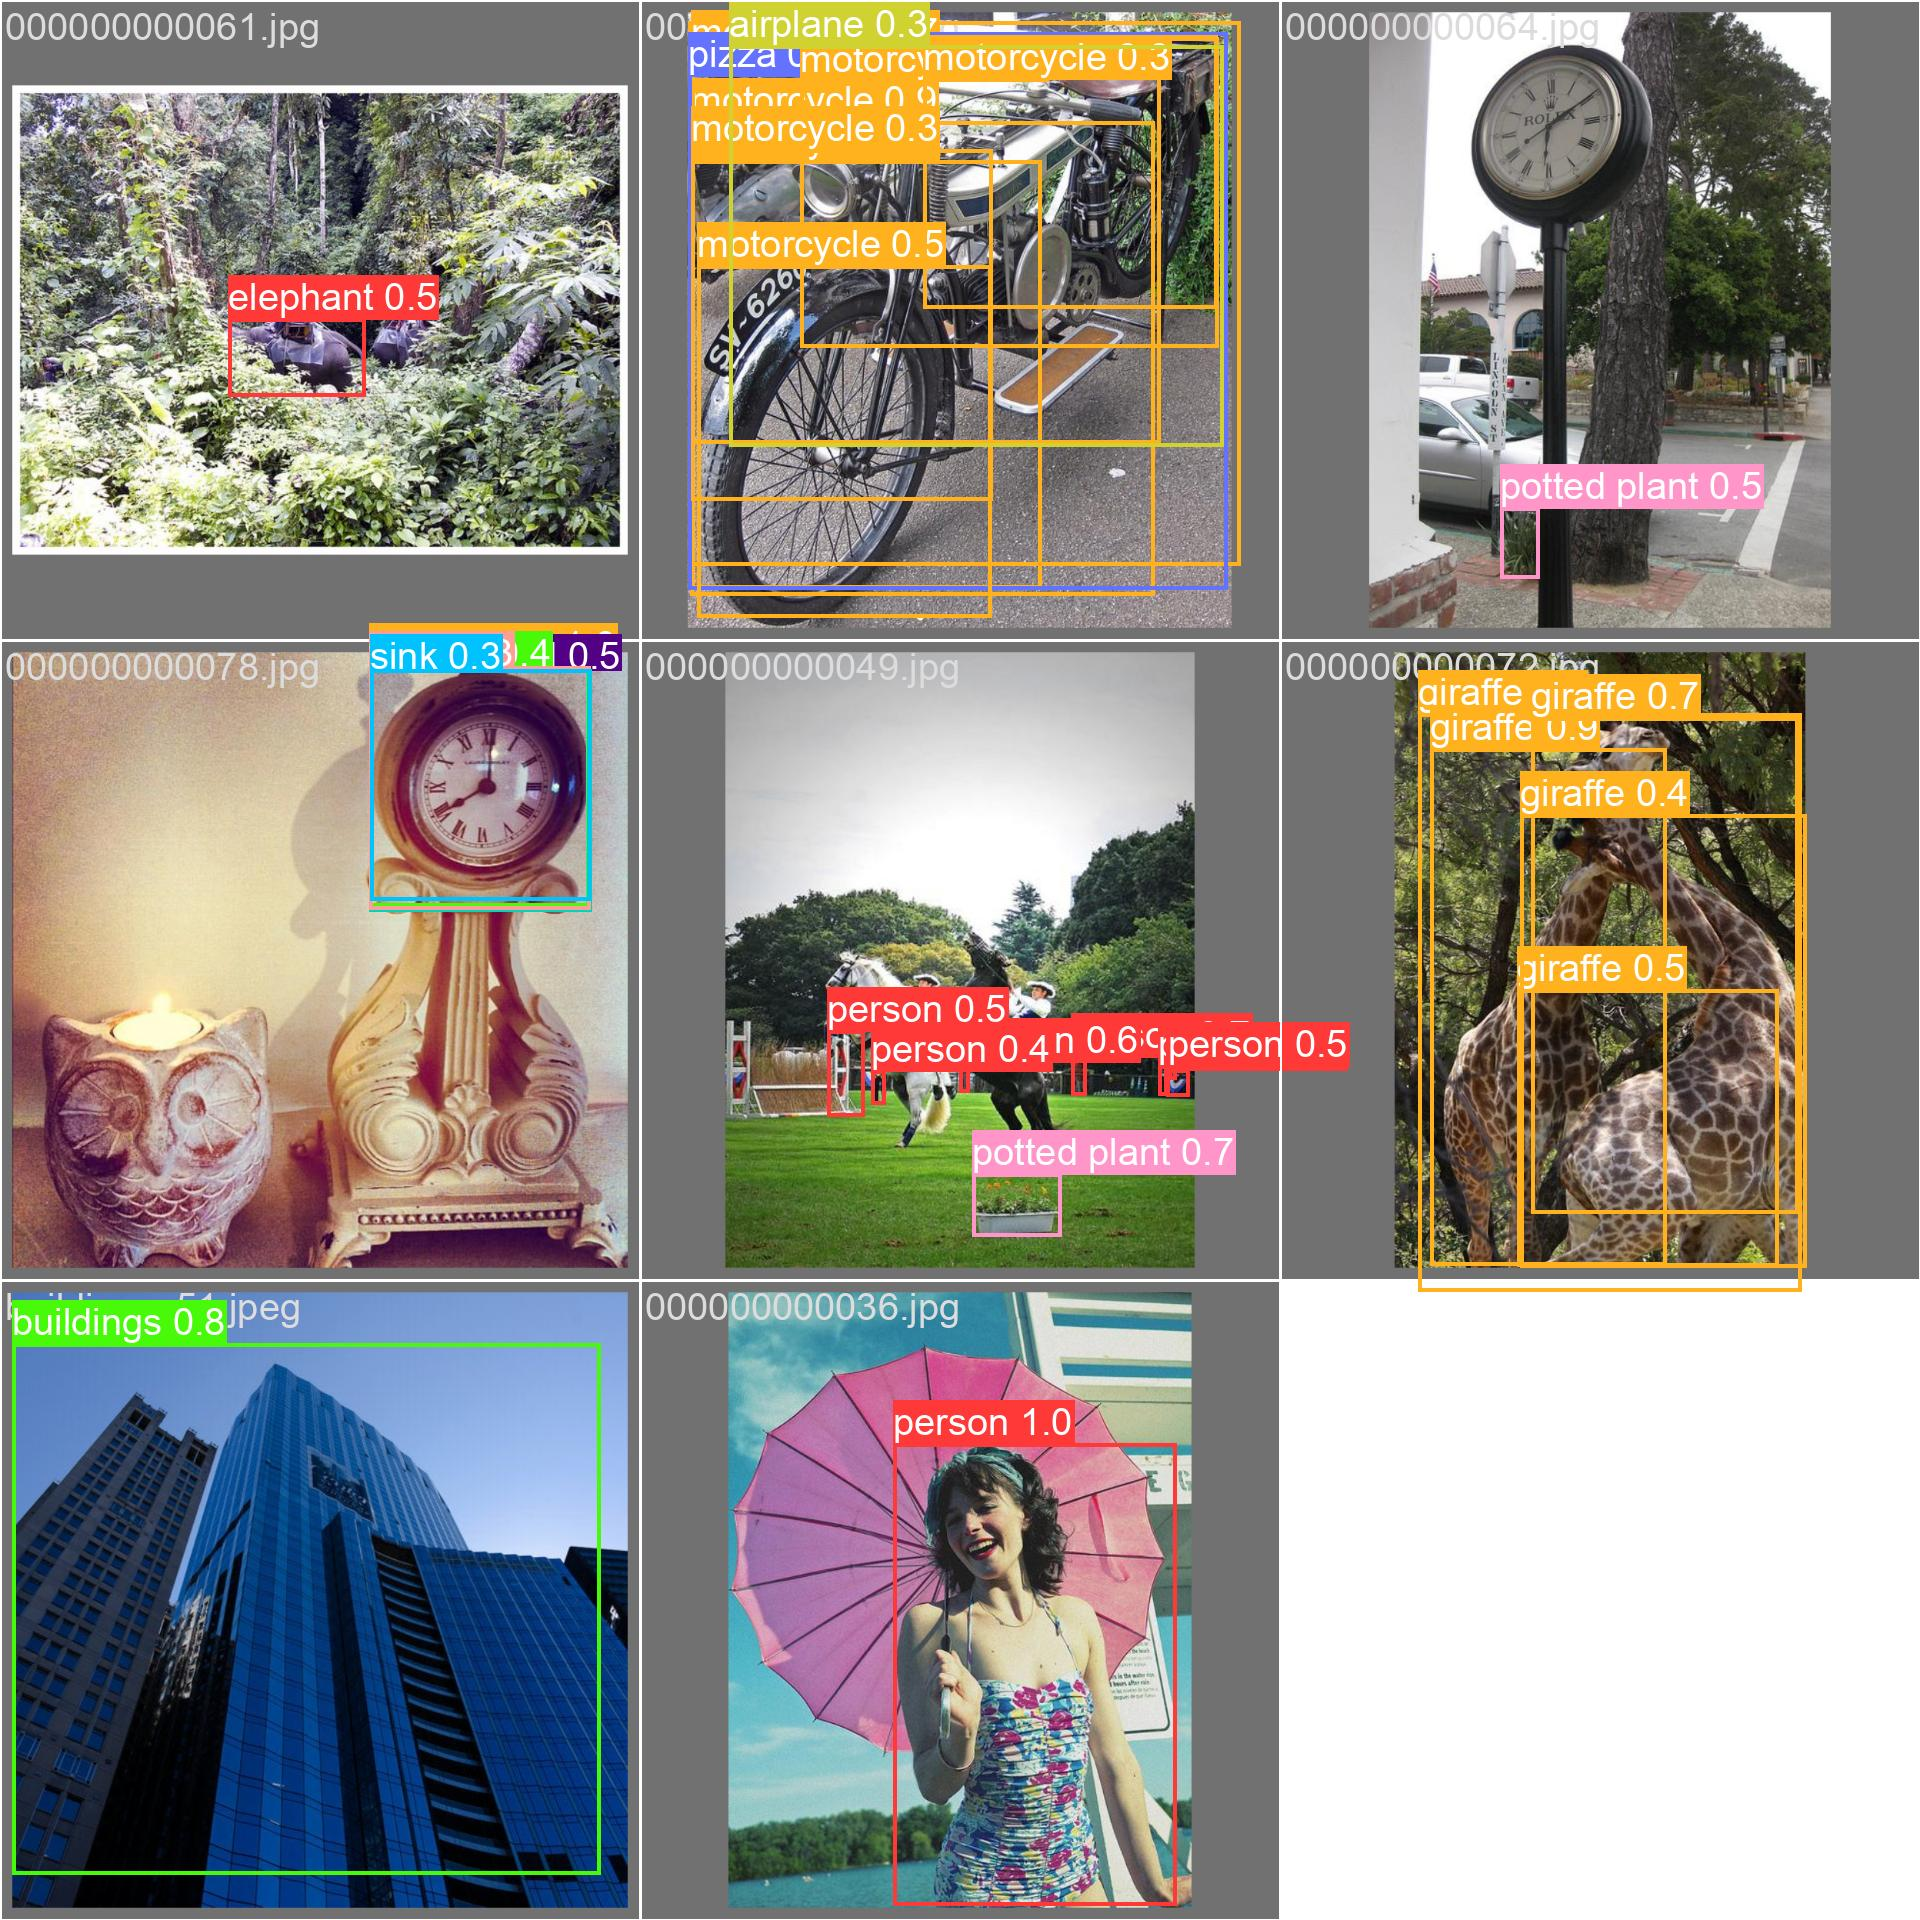

In [ ]:
Image('/content/PROJECT/results/100_epochs-/val_batch2_pred.jpg')


image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/3565.jpg: 608x800 (no detections), 116.3ms
Speed: 4.5ms preprocess, 116.3ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 800)

image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/3335.jpg: 608x800 (no detections), 9.3ms
Speed: 3.0ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 800)

image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/345.jpg: 608x800 (no detections), 14.0ms
Speed: 3.1ms preprocess, 14.0ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 800)

image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/3220.jpg: 608x800 2 persons, 1 bus, 1 buildings, 10.2ms
Speed: 3.4ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

image 1/1 /content/drive/MyDrive/Yolov8-custom/image-for-pred/1495.jpg: 608x800 1 buildings, 9.7ms
Speed: 3.1ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape 

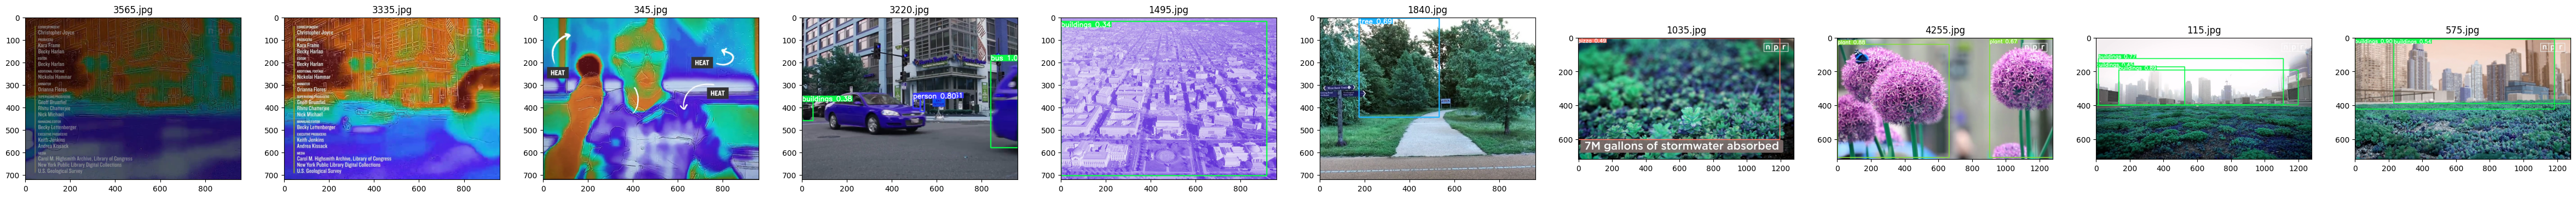

In [16]:
new_model = YOLO('/content/drive/MyDrive/Yolov8-custom/result/100_epochs/weights/best.pt')
folder_path = '/content/drive/MyDrive/Yolov8-custom/image-for-pred'
image_files = os.listdir(folder_path)
all_result_arrays = []

for image_file in image_files:
    if image_file.endswith('.jpg') or image_file.endswith('.jpeg') or image_file.endswith('.png'):
        # Predict on the current image file
        image_path = os.path.join(folder_path, image_file)
        pred_imgs = new_model.predict(image_path, conf=0.3)

        # Append the result array to the list
        result_array = pred_imgs[0].plot()
        all_result_arrays.append(result_array)

# Plot all result arrays together
fig, axes = plt.subplots(1, len(all_result_arrays), figsize=(len(all_result_arrays)*6, 6))
for i, result_array in enumerate(all_result_arrays):
    axes[i].imshow(result_array)
    axes[i].set_title(image_files[i])
plt.show()